In [5]:

import matplotlib.pyplot as plt
import numpy as np
import itertools as it
from math import pi
     

from qutip import *
from scipy import *

In [7]:
toy_models = {
            "1":
               {
                   "j_map" : [[0,1,1,-1,0],[1,0,1,0,-1],[1,1,0,1,1],[-1,0,1,0,1],[0,-1,1,1,0]],
                   "gs_indeces": [  {"i":0, "suppressed": True},
                                    {"i":3, "suppressed": False},
                                    {"i":7, "suppressed": False}]
                   },
            "2": {
                    "j_map" : [[0,2,1,2,1],[2,0,-2,-1,1],[1,-2,0,1,2],[2,-1,1,0,-2],[1,1,2,-2,0]],
                    "gs_indeces": [{"i":0, "suppressed": False},
                                    {"i":2, "suppressed": False},
                                    {"i":5, "suppressed": True},
                                    {"i":6, "suppressed": False},
                                    {"i":8, "suppressed": False},
                                    {"i":9, "suppressed": False}]
                },
            "3": {
                    "j_map" : [[0,0,1,0,0,0],[0,0,0,1,0,0],[1,0,0,-1,1,-1],[0,1,-1,0,1,-1],[0,0,1,1,0,1], [0,0,-1,-1,1,0]],
                    "gs_indeces": [{"i":1, "suppressed": True},
                                    {"i":20, "suppressed": False},
                                    {"i":23, "suppressed": False}]
                },

            "4": {
                    "j_map" : [[0,1,0,0],[0,0,-1,-1],[0,-1,0,-1],[0,-1,-1,0]],
                    "gs_indeces": [{"i":1, "suppressed": True},
                                    {"i":2, "suppressed": True},
                                    {"i":3, "suppressed": False}]
                },

            
            
            }

model = toy_models["2"]
j_map = model["j_map"]
gs_indeces = model["gs_indeces"]
N = len(j_map[0])

In [8]:


si = qeye(2)
sz = sigmaz()


# Problem Hamiltonian
# Hp = -sum(Jij sigma_i_z sigma_j_z)


Hp = 0
for i in range(len(j_map)):
    for j in range(i,len(j_map[i])):

        sigma_i = [si if k != i else sz for k in range(N) ]
        sigma_j = [si if l != j else sz for l in range(N) ]

        Hp += j_map[i][j] * tensor(sigma_i) * tensor(sigma_j)   


print(Hp)
print(Hp.diag())

Quantum object: dims=[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape=(32, 32), type='oper', dtype=CSR, isherm=True
Qobj data =
[[5. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 5. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 5.]]
[ 5.  1.  5. -7.  1.  5.  5.  1.  5.  5.  1. -7. -7.  1. -7. -7. -7. -7.
  1. -7. -7.  1.  5.  5.  1.  5.  5.  1. -7.  5.  1.  5.]


In [162]:
# transverse field hamiltonian

si = qeye(2)
sx = sigmax()

Ht = 0
for i in range(N):
    sigma_x = [si if k != i else sx for k in range(N)]
    Ht += tensor(sigma_x)

Ht

Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = (32, 32), type = oper, isherm = True
Qobj data =
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]

In [207]:
# the time-dependent hamiltonian in list-function format
# args = {"t_max": 1}
# h_t = [
#     [-Ht, lambda t, args: (args["t_max"] - t) / args["t_max"]],
#     [-Hp, lambda t, args: t / args["t_max"]],
# ]



h_t = [
    [-Ht, lambda h, args: h], 
     -Hp,
]

# transform Hamiltonian to QobjEvo
h_t = QobjEvo(h_t)

entropy_vals = []

# for h in np.arange(0.1,1,0.1):
#     H = h_t(h)
#     _, ekets = H.eigenstates(eigvals=1)
#     gs = ekets[0]
#     entropy_vals.append(
#         [
#             entropy_vn(gs.ptrace(list(bp)))
#             for bp in list(it.combinations(range(N), (N//2) + 1))
#         ]
#     )


h= 0.001

H = h_t(h)
evals, ekets = H.eigenstates(eigvals=7)
gs = ekets[0]
entropy_vals.append(
    [
        [bp,round(entropy_vn(gs.ptrace(list(bp))),6)]
        for bp in list(it.combinations(range(N), int(np.ceil(N/2))))
    ]
)
entropy_vals
    

[[[(0, 1, 2), 1.177971],
  [(0, 1, 3), 1.177971],
  [(0, 1, 4), 0.924814],
  [(0, 2, 3), 0.924814],
  [(0, 2, 4), 0.924814],
  [(0, 3, 4), 1.177971],
  [(1, 2, 3), 0.924814],
  [(1, 2, 4), 1.177971],
  [(1, 3, 4), 0.924814],
  [(2, 3, 4), 1.177971]]]

In [212]:
gs

Quantum object: dims = [[2, 2, 2, 2, 2], [1, 1, 1, 1, 1]], shape = (32, 1), type = ket
Qobj data =
[[-3.16227676e-01]
 [-1.58146699e-04]
 [-3.16227676e-01]
 [-2.63786617e-05]
 [-1.58146699e-04]
 [-3.95152650e-04]
 [-3.16227676e-01]
 [-1.58146699e-04]
 [-3.16227676e-01]
 [-3.16227676e-01]
 [-1.58146699e-04]
 [-2.63786617e-05]
 [-2.63786617e-05]
 [-1.58146699e-04]
 [-2.63786617e-05]
 [-2.63786617e-05]
 [-2.63786617e-05]
 [-2.63786617e-05]
 [-1.58146699e-04]
 [-2.63786617e-05]
 [-2.63786617e-05]
 [-1.58146699e-04]
 [-3.16227676e-01]
 [-3.16227676e-01]
 [-1.58146699e-04]
 [-3.16227676e-01]
 [-3.95152650e-04]
 [-1.58146699e-04]
 [-2.63786617e-05]
 [-3.16227676e-01]
 [-1.58146699e-04]
 [-3.16227676e-01]]

In [154]:
# [ev - evals[0] for ev in evals]
type(entropy_vals[0])
[bp_e[1] for bp_e in entropy_vals[0]]

np.e

2.718281828459045

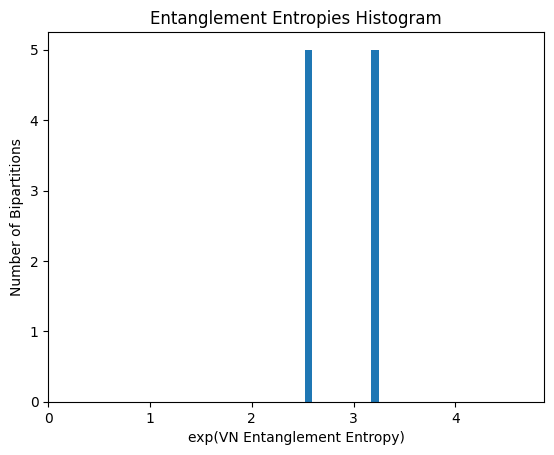

[3.248, 3.248, 2.521, 2.521, 2.521, 3.248, 2.521, 3.248, 2.521, 3.248]


In [165]:

# Pull raw entanglement entropy values out of results. Round to 3 decimal places so that hist bins aren't over precise
ee_vals = [round(np.e ** bp_e[1],3) for bp_e in entropy_vals[0]]

plt.hist(ee_vals)
plt.xlim(0,max(ee_vals)*1.5)

plt.title('Entanglement Entropies Histogram')
plt.ylabel('Number of Bipartitions')
plt.xlabel("exp(VN Entanglement Entropy)")
plt.show()
print(ee_vals)


In [239]:
# Generate "artificial" fair sampling state

t_i = "1"
N = len(toy_models[t_i]["j_map"][0])

fair_sampling_gs = np.zeros([2**N,1])
gs_size = len(toy_models[t_i]["gs_indeces"])



for gs in toy_models[t_i]["gs_indeces"]:
    fair_sampling_gs[gs["i"]] = 1/np.sqrt(gs_size)
    # fair_sampling_gs[(2**N) - 1 - gs["i"]] = 1/np.sqrt(gs_size)


fair_sampling_gs = Qobj(fair_sampling_gs, dims = [[2 for i in range(N)], [1 for i in range(N)]])
print(fair_sampling_gs)


entropy_vals = []
entropy_vals.append(
    [
        [bp,round(entropy_vn(fair_sampling_gs.ptrace(list(bp))),6)]
        for bp in list(it.combinations(range(N), int(np.ceil(N/2))))
    ]
)
entropy_vals

Quantum object: dims = [[2, 2, 2, 2, 2], [1, 1, 1, 1, 1]], shape = (32, 1), type = ket
Qobj data =
[[0.57735027]
 [0.        ]
 [0.        ]
 [0.57735027]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.57735027]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


[[[(0, 1, 2), 0.381264],
  [(0, 1, 3), 0.636514],
  [(0, 1, 4), 0.636514],
  [(0, 2, 3), 0.636514],
  [(0, 2, 4), 0.636514],
  [(0, 3, 4), 0.381264],
  [(1, 2, 3), 0.636514],
  [(1, 2, 4), 0.636514],
  [(1, 3, 4), 0.381264],
  [(2, 3, 4), -0.0]]]

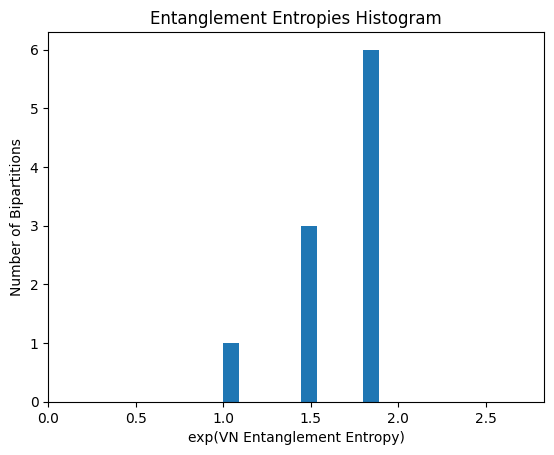

[1.464, 1.89, 1.89, 1.89, 1.89, 1.464, 1.89, 1.89, 1.464, 1.0]


NameError: name 'N' is not defined